In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime as dt
%matplotlib inline

import requests
import json
import calendar
import time

In [15]:
tweets_df = pd.read_pickle('./Data/Raw/XRPDataSet.pkl')
xrp = pd.read_pickle('./Data/Cleaned/xrp_price_data_hourly.pkl')

In [1]:
toremove = dict.fromkeys((ord(c) for c in u'\xa0\n\t '))

In [3]:
tweets_df['datetime'] = tweets_df['datetime'].apply(lambda x : x.to_pydatetime())

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25435 entries, 0 to 25434
Data columns (total 13 columns):
ID               25435 non-null float64
datetime         25435 non-null datetime64[ns]
is_reply         25435 non-null float64
is_retweet       25435 non-null float64
nbr_favorite     25435 non-null float64
nbr_reply        25435 non-null float64
nbr_retweet      25435 non-null float64
text             25435 non-null object
url              25435 non-null object
user_id          25435 non-null object
usernameTweet    25435 non-null object
has_media        8834 non-null float64
medias           8834 non-null object
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 2.5+ MB


In [5]:
tweets_df.head()

,ID,datetime,is_reply,is_retweet,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,has_media,medias
0,9.885302e+17,2018-04-23 17:29:08,0.0,0.0,0.0,0.0,0.0,New post (Could Ripple XRP Really Reach $1...,/ExcelVisibility/status/988530235493748736,815322320,ExcelVisibility,NaN,NaN
1,9.847927e+17,2018-04-13 09:57:41,0.0,0.0,0.0,0.0,0.0,"Did you know that you can buy, sell, store, co...",/coindirectcom/status/984792745666580481,915453520924545025,coindirectcom,1.0,[https://t.co/h1CTJHGwPs]
2,9.863800e+17,2018-04-17 19:05:02,0.0,0.0,0.0,0.0,0.0,1 Ripple = 0.6589 USD. Ripple has changed ...,/RippleMarket/status/986380040517701633,848989770923601922,RippleMarket,NaN,NaN
3,9.853410e+17,2018-04-14 22:16:19,0.0,0.0,0.0,0.0,1.0,# Batteries #ITO #ICO #Token #TokenSale #...,/nsdelpitiya/status/985341014339608576,880003387672088576,nsdelpitiya,NaN,NaN
4,9.866047e+17,2018-04-18 09:57:42,0.0,0.0,0.0,0.0,0.0,How Is #Ripple Different From All Other #Cryp...,/Matthix191/status/986604686856933376,916641996823031808,Matthix191,1.0,[https://t.co/xF5l49lz8P]


In [6]:
min(tweets_df['datetime'])

Timestamp('2018-04-13 07:09:42')

In [7]:
def cielDatetime(d):
    delta = 3600-((d.minute*60+d.second)%3600)
    
    td = dt.timedelta(seconds=delta)
    return d.to_pydatetime()+td

def datetimeToZulu(d):
    td = dt.timedelta(minutes=240)
    return d.to_pydatetime()+td

In [8]:
tweets_df['rounded_dateTime'] = tweets_df['datetime'].apply(lambda t : cielDatetime(t))
# tweets_df['rounded_zulu'] = tweets_df['rounded_dateTime'].apply(lambda t : datetimeToZulu(t))

In [9]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25435 entries, 0 to 25434
Data columns (total 14 columns):
ID                  25435 non-null float64
datetime            25435 non-null datetime64[ns]
is_reply            25435 non-null float64
is_retweet          25435 non-null float64
nbr_favorite        25435 non-null float64
nbr_reply           25435 non-null float64
nbr_retweet         25435 non-null float64
text                25435 non-null object
url                 25435 non-null object
user_id             25435 non-null object
usernameTweet       25435 non-null object
has_media           8834 non-null float64
medias              8834 non-null object
rounded_dateTime    25435 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(7), object(5)
memory usage: 2.7+ MB


In [10]:
dateTimeGroup = tweets_df.groupby('rounded_dateTime')['ID'].count().rename('tweetCount').reset_index()

In [11]:
dateTimeGroup.head(10)

,rounded_dateTime,tweetCount
0,2018-04-13 08:00:00,83
1,2018-04-13 09:00:00,131
2,2018-04-13 10:00:00,169
3,2018-04-13 11:00:00,116
4,2018-04-13 12:00:00,112
5,2018-04-13 13:00:00,123
6,2018-04-13 14:00:00,135
7,2018-04-13 15:00:00,93
8,2018-04-13 16:00:00,110
9,2018-04-13 17:00:00,117


In [12]:
dateTimeGroup.describe()

,tweetCount
count,267.000000
mean,95.262172
std,28.270687
min,42.000000
25%,73.500000
50%,94.000000
75%,111.000000
max,221.000000


In [13]:
url = 'https://min-api.cryptocompare.com/data/histohour?fsym=XRP&tsym=USD&limit=297&aggregate=1&e=CCCAGG'
response = requests.get(url)
historical_xrp_prices = json.loads(response.text)
fromDate = historical_xrp_prices['TimeFrom']
toDate = historical_xrp_prices['TimeTo']

In [14]:
print(str(len(historical_xrp_prices['Data'])) + ' Price Samples')
print('From: ' + str(dt.datetime.utcfromtimestamp(int(fromDate))))
print('To: ' + str(dt.datetime.utcfromtimestamp(int(toDate)))) 

298 Price Samples
From: 2018-04-19 16:00:00
To: 2018-05-02 01:00:00


In [18]:
priceData = historical_xrp_prices['Data']

xrp_prices = pd.DataFrame()

for price in priceData:
    price['time'] = dt.datetime.fromtimestamp(price['time'])
    xrp_prices = xrp_prices.append(price, ignore_index=True)

In [23]:
xrp_prices.head()

,close,high,low,open,time,volumefrom,volumeto
0,0.7220,0.7263,0.7199,0.7253,2018-04-19 01:00:00,2273473.48,1642704.97
1,0.7221,0.7274,0.7220,0.7223,2018-04-19 02:00:00,2180109.50,1579545.08
2,0.7124,0.7272,0.7086,0.7220,2018-04-19 03:00:00,5169916.20,3699691.54
3,0.7097,0.7201,0.7092,0.7124,2018-04-19 04:00:00,5675740.79,4048588.20
4,0.7184,0.7231,0.7078,0.7095,2018-04-19 05:00:00,3633517.01,2597313.81


In [19]:
xrpDelta = xrp.set_index('time')
xrpDelta.sort_index(inplace=True)
xrpDelta = xrpDelta.diff()

In [22]:
xrpDelta.head()

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-04-13 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-13 05:00:00,-0.0091,-0.0099,-0.0032,-0.0052,-4787186.94,-3166713.50
2018-04-13 06:00:00,0.0094,0.0009,-0.0047,-0.0092,1225597.31,769881.90
2018-04-13 07:00:00,0.0006,0.0061,0.0105,0.0094,-341439.85,-156470.36
2018-04-13 08:00:00,0.0385,0.0387,0.0030,0.0006,12699130.08,8654503.43


In [40]:
prev = xrp.set_index('time')
temp = pd.concat([pd.Series([np.nan]), xrp['close']]).reset_index(drop=True)
prev['close'] = temp[0:298].values
prev.head()

In [51]:
xrpDelta['pDelta'] = xrpDelta['close']/prev['close']
xrpDelta['pDelta'][0] = 0.027

In [52]:
xrpDelta.head()

,close,high,low,open,volumefrom,volumeto,pDelta
time,,,,,,,
2018-04-13 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.027000
2018-04-13 05:00:00,-0.0091,-0.0099,-0.0032,-0.0052,-4787186.94,-3166713.50,-0.014048
2018-04-13 06:00:00,0.0094,0.0009,-0.0047,-0.0092,1225597.31,769881.90,0.014717
2018-04-13 07:00:00,0.0006,0.0061,0.0105,0.0094,-341439.85,-156470.36,0.000926
2018-04-13 08:00:00,0.0385,0.0387,0.0030,0.0006,12699130.08,8654503.43,0.059349


In [56]:
xrpDelta = xrpDelta.reset_index('time')
xrpDelta = xrpDelta[['time', 'pDelta']]
xrpDelta['timeId'] = xrpDelta['time'].apply(lambda t : time.mktime(t.timetuple()))

In [57]:
xrpDelta.head()

,time,pDelta,timeId
0,2018-04-13 04:00:00,0.027000,1.523606e+09
1,2018-04-13 05:00:00,-0.014048,1.523610e+09
2,2018-04-13 06:00:00,0.014717,1.523614e+09
3,2018-04-13 07:00:00,0.000926,1.523617e+09
4,2018-04-13 08:00:00,0.059349,1.523621e+09


In [58]:
xrpDelta.to_pickle('./Data/Cleaned/xrp_delta.pkl')

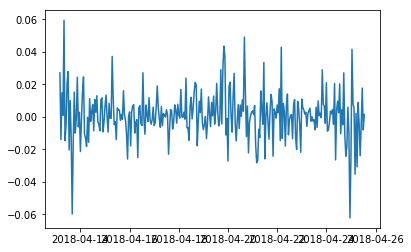

In [54]:
plt.plot(xrpDelta['pDelta'])

In [20]:
xrp_prices.to_pickle('./xrp_price_data_hourly.pkl')

In [ ]:
sns.distplot(dateTimeGroup['tweetCount'])

In [17]:
dateTimeGroup.to_pickle('./xrp_grouped_by_time')

In [ ]:
tweets_df.to_pickle('./xrp_wi')